In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
data = pd.read_csv("/content/spam_prc.csv")
data = data[data.columns[1:]]
data['category'] = data['category'].replace(['ham','spam'], [0,1])

In [13]:
data.to_csv("/content/sms_data.csv", index=False)

In [14]:
data = pd.read_csv("/content/sms_data.csv")

# 3. 머신러닝 모델링

## 3-1. 토큰화

In [15]:
data.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
X_data = data['text']
y_data = data['category']


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data) # 텍스트를 토큰화 함.

In [20]:
word_to_index = tokenizer.word_index
# tokenizer.word_counts.items()
vocab_size = len(word_to_index) + 1

- `word_to_index` : 빈도수가 낮을 수록 높은 정수를 갖는 딕셔너리
- `vocab_size` : 단어 집합의 크기 (패딩 처리를 생각해 +1을 함)

## 3-2. 훈련 데이터와 테스트 데이터 분리

In [28]:
X_data = sequences # 토큰화한 텍스트를 다시 X_data에 넣는다.
print("문자의 최대 문자열 길이 : %d" % max(len(l) for l in X_data))
print('문자의 평균 길이 : %.0f' % (sum(map(len, X_data))/len(X_data)))


문자의 최대 문자열 길이 : 189
문자의 평균 길이 : 16


In [29]:
max_len = 189
data = pad_sequences(X_data, maxlen = max_len)

In [30]:
print("Train_data", data.shape)

Train_data (5169, 189)


In [32]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)

In [33]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train])

## 3-3. 머신러닝을 활용한 스팸 메일 분류


### GBM

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [81]:
start_time = time.time()
model=GradientBoostingClassifier(n_estimators=200, random_state=200, max_features=30)
model.fit(X_train, y_train)


print('GBM 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))
print('GBM 모델의 시간 측정 : {0:.1f}초'.format(time.time()- start_time))

GBM 모델의 정확도 : 0.932
GBM 모델의 시간 측정 : 1.1초


In [78]:
depths=range(1,35)
gbc_train, gbc_test=[],[]

GBM 모델의 정확도 : 0.941


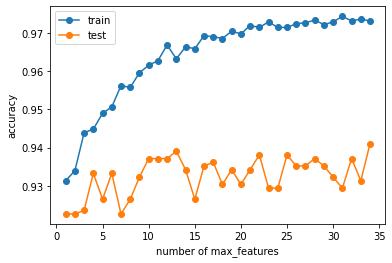

In [79]:
for i in depths:
  model=GradientBoostingClassifier(n_estimators=200, random_state=200, max_features=i)
  model.fit(X_train,y_train)

  gbc_train.append(model.score(X_train, y_train))
  gbc_test.append(model.score(X_test, y_test))

plt.plot(depths, gbc_train, label='train',marker='o')
plt.plot(depths, gbc_test, label='test',marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of max_features')
plt.legend()

print('GBM 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))

### RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier
import time

In [70]:
start_time = time.time()
model=RandomForestClassifier(n_estimators=75, random_state=75, max_features=55)
model.fit(X_train, y_train)


print('랜덤 포레스트 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))
print('랜덤 포레스트 모델의 시간 측정 : {0:.1f}초'.format(time.time()- start_time))

랜덤 포레스트 모델의 정확도 : 0.935
랜덤 포레스트 모델의 시간 측정 : 1.2초


In [67]:
depths=range(1,75)
forest_train, forest_test=[],[]

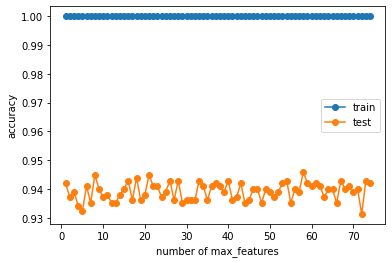

랜덤포레스트 모델의 정확도 : 0.942


In [68]:
for i in depths:
  model=RandomForestClassifier(n_estimators=75, random_state=75, max_features=i)
  model.fit(X_train,y_train)

  forest_train.append(model.score(X_train, y_train))
  forest_test.append(model.score(X_test, y_test))


plt.plot(depths, forest_train, label='train',marker='o')
plt.plot(depths, forest_test, label='test',marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of max_features')
plt.legend()
plt.show()

print('랜덤포레스트 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))

### Baggig

In [58]:
from sklearn.ensemble import BaggingClassifier
import time

In [63]:
start_time = time.time()
model = BaggingClassifier(n_estimators=80, random_state=80, max_features=15)
model.fit(X_train, y_train)



print('배깅 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))
print('배깅 모델의 시간 측정 : {0:.1f}초'.format(time.time()- start_time))

배깅 모델의 정확도 : 0.926
배깅 모델의 시간 측정 : 0.6초


최적의 `n_estimators`와 `max_features`를 찾아낸다.

In [60]:
depths=range(1,85) # 1~ 85까지 범위로 최적의 파라미터를 찾아낼 예정이다.
bagging_train, bagging_test=[],[]

배깅 모델의 정확도 : 0.943


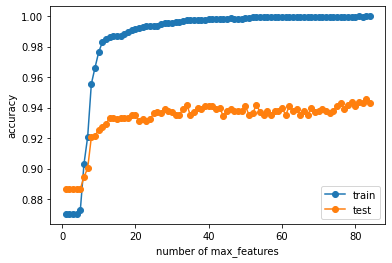

In [61]:
for i in depths:
  model=BaggingClassifier(n_estimators=85, random_state=85, max_features=i) # max_features와 n_estimator를 변경하면서 최적의 파라미터를 찾는다.
  model.fit(X_train,y_train)


  bagging_train.append(model.score(X_train, y_train)) # 모델의 성능들을 배깅리스트에 저장한다.
  bagging_test.append(model.score(X_test, y_test))



plt.plot(depths, bagging_train, label='train',marker='o')
plt.plot(depths, bagging_test, label='test',marker='o')
plt.ylabel('accuracy')
plt.xlabel('number of max_features')
plt.legend()

print('배깅 모델의 정확도 : {0:.3f}'.format(model.score(X_test, y_test)))

### XGBoost

XGboost 정확도: 0.9391
XGboost 수행 시간: 43.7 초 


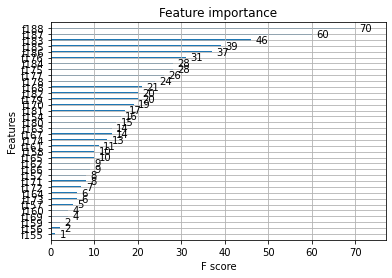

In [83]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model=XGBClassifier()
model.fit(X_train, y_train)

ax=plot_importance(model)

print('XGboost 정확도: {0:.4f}'.format(model.score(X_test, y_test)))
print("XGboost 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))